<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

## CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

## Import libraries

In [1]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
# insert code here
## Import libraries
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.metrics import confusion_matrix

# import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

## Load data
Use the **Keras**' load method.

In [4]:
# insert code here
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Check some data

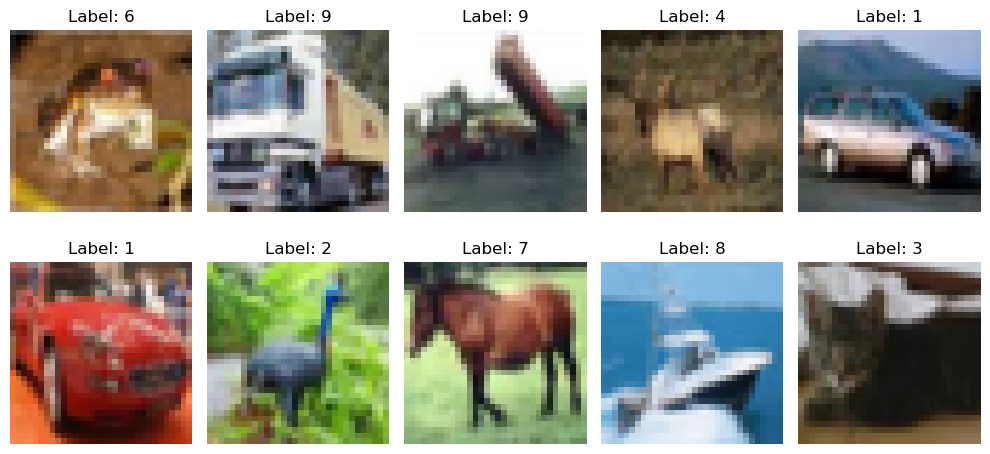

In [5]:
# insert code here
# Display some images from the training dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {y_train[i][0]}')  # Get label from y_train
    ax.axis('off')

plt.tight_layout()
plt.show()

## Prepare data

In [6]:
# insert code here
# Normalize pixel values to [0, 1]

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

## Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [8]:
# Print initial shapes
print(f'Original X_train shape: {X_train.shape}')  
print(f'Original y_train shape: {y_train.shape}')  
print(f'Original X_test shape: {X_test.shape}')    
print(f'Original y_test shape: {y_test.shape}')    

# Flatten labels
y_train = y_train.flatten()  
y_test = y_test.flatten()    

# One-hot encode labels
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

Original X_train shape: (50000, 32, 32, 3)
Original y_train shape: (50000, 1)
Original X_test shape: (10000, 32, 32, 3)
Original y_test shape: (10000, 1)


In [9]:
# insert code here
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3)))  # Define input shape here
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())  
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(10, activation='softmax'))  

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Add Dense layers on top

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,924 (484.08 KB)

 Trainable params: 123,924 (484.08 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the model

In [22]:
# insert code here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Fit the training data

In [23]:
# Uncomment the statement below to allow online monitoring with TensorBoard
tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

In [24]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.1675 - loss: 2.0911 - val_accuracy: 0.2930 - val_loss: 1.8266
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3260 - loss: 1.7324 - val_accuracy: 0.4557 - val_loss: 1.4666
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.4603 - loss: 1.4532 - val_accuracy: 0.5337 - val_loss: 1.2759
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5334 - loss: 1.2902 - val_accuracy: 0.5791 - val_loss: 1.1753
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.5709 - loss: 1.1962 - val_accuracy: 0.5707 - val_loss: 1.2089
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6058 - loss: 1.1164 - val_accuracy: 0.6247 - val_loss: 1.0642
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6207 - loss: 1.0765 - val_accuracy: 0.6255 - val_loss: 1.0637
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 23ms/step - accuracy: 0.6378 -

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit.
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [25]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 28984), started 4 days, 19:33:22 ago. (Use '!kill 28984' to kill it.)

## Create predictions

In [27]:
# Generate predictions
predictions = model.predict(X_test)

# Get predicted classes
predicted_classes = tf.argmax(predictions, axis=1).numpy()

# Optional: Compare predicted classes with true labels
print(predicted_classes)
print(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
[3 8 8 ... 5 4 7]
[3 8 8 ... 5 1 7]


In [28]:
predicted_classes = tf.argmax(predictions, axis=1).numpy()

## Evaluate the model

In [31]:
# insert code here
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6570 - loss: 1.0002
Test loss: 0.9996, Test accuracy: 0.6599


## Visualisation of cost

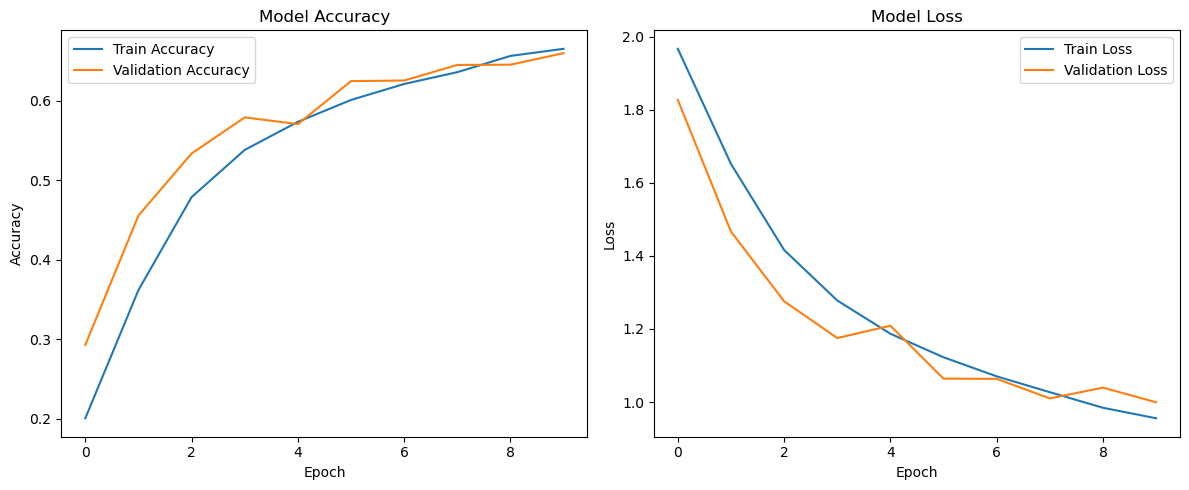

In [32]:
# insert code here
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Results

In [35]:
y_test_flat = y_test.flatten()

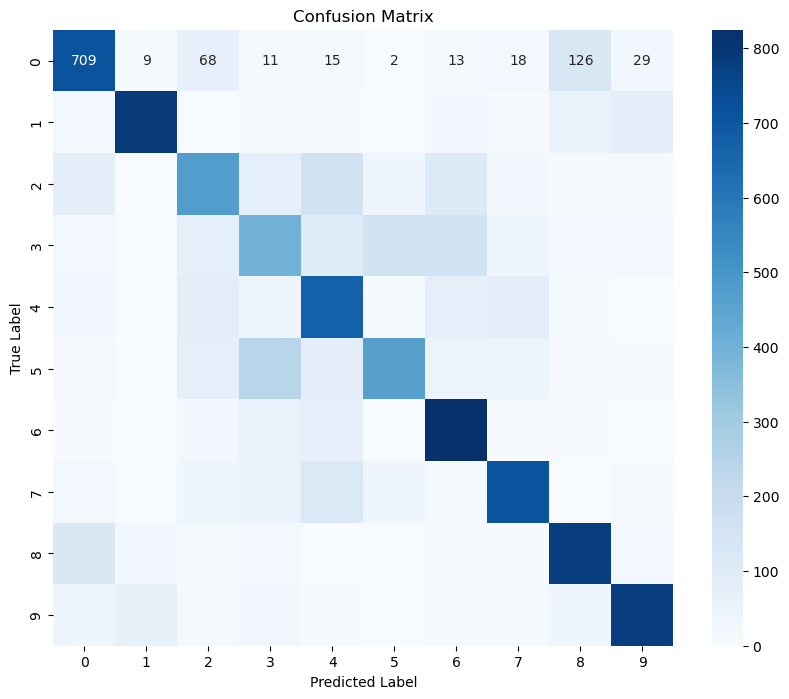

In [36]:
# insert code here
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
cm = confusion_matrix(y_test_flat, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
from sklearn.metrics import classification_report

report = classification_report(y_test_flat, predicted_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
])
print(report)

              precision    recall  f1-score   support

    Airplane       0.67      0.71      0.69      1000
  Automobile       0.87      0.79      0.83      1000
        Bird       0.53      0.47      0.50      1000
         Cat       0.42      0.40      0.41      1000
        Deer       0.54      0.67      0.60      1000
         Dog       0.65      0.46      0.54      1000
        Frog       0.65      0.82      0.73      1000
       Horse       0.74      0.71      0.72      1000
        Ship       0.74      0.78      0.76      1000
       Truck       0.81      0.78      0.79      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.66     10000
weighted avg       0.66      0.66      0.66     10000



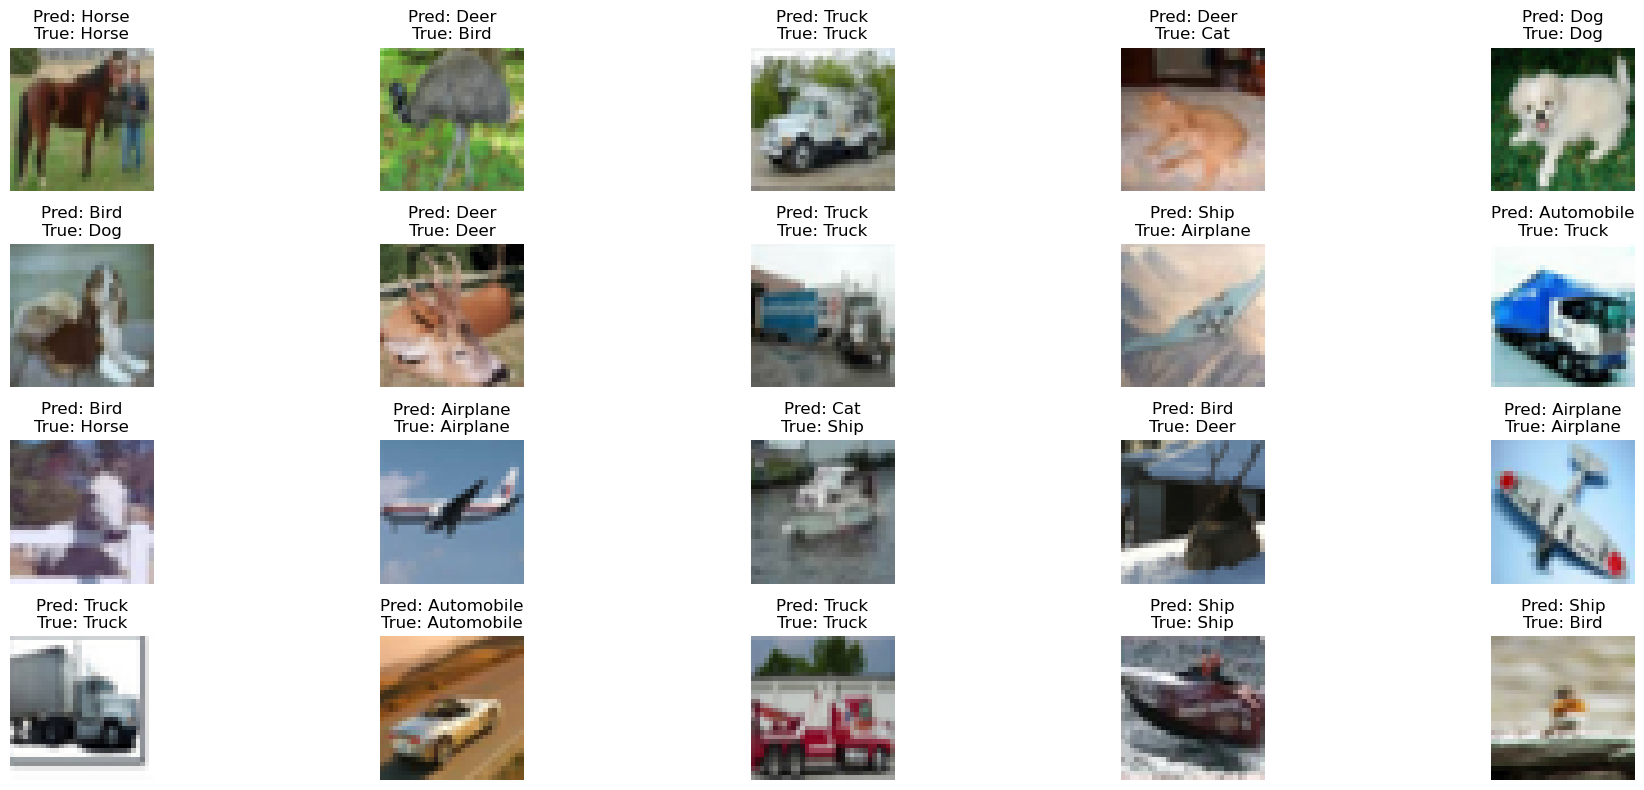

In [38]:
# CIFAR-10 class names
class_names = [
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
    'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]

# Number of images to display
num_images = 20

# Randomly select indices from the test set
indices = np.random.choice(len(X_test), num_images, replace=False)

# Set up the plot
plt.figure(figsize=(20, 8))  # Adjust the figure size for 20 images

# Loop through the selected indices
for i, idx in enumerate(indices):
    plt.subplot(4, 5, i + 1)  # 4 rows and 5 columns
    plt.imshow(X_test[idx])  # Display the test image
    plt.title(f"Pred: {class_names[predicted_classes[idx]]}\nTrue: {class_names[y_test_flat[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



